### Student Information
Name:

Student ID:

GitHub ID:

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [2]:
### Begin Assignment Here

### 2. Kaggle Competition

In [1]:
## GPU Setup
import os
from tensorflow.python.client import device_lib

os.environ['CUDA_VISIBLE_DEVICES']='0'
print(device_lib.list_local_devices())

2022-11-20 20:27:18.632268: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6949348026233971180
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 23350345728
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1886122618048457363
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090 Ti, pci bus id: 0000:02:00.0, compute capability: 8.6"
]


2022-11-20 20:27:22.662816: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 20:27:22.673582: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-11-20 20:27:22.732690: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce RTX 3090 Ti computeCapability: 8.6
coreClock: 1.905GHz coreCount: 84 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 938.86GiB/s
2022-11-20 20:27:22.732753: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-11-20 20:27:22.743924: I tensorflow/stream_executor/platform/default/dso_

In [2]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [3]:
w2v_google_model.most_similar('happy', topn=10)

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [2]:
## Read Data into pd dataframe
import pandas as pd
import json

emotion_df = pd.read_csv('emotion.csv')
di_df = pd.read_csv('data_identification.csv')
sample_sub_df = pd.read_csv('sampleSubmission.csv')
tweets_df = pd.read_pickle("tweets_df.pkl")

# with open('tweets_DM.json') as f:
#     tweets_df = pd.json_normalize(json.loads(line)['_source']['tweet'] for line in f)
# tweets_df.to_pickle("tweets_df.pkl") 

In [10]:
tweets_df.shape

(1867535, 3)

In [11]:
emotion_df.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [12]:
di_df.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [13]:
sample_sub_df.head()

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise


In [5]:
tweets_df

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [3]:
t_data = pd.merge(tweets_df, emotion_df)
t_data

,hashtags,tweet_id,text,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...,...
1455558,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,[],0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,[blessyou],0x2cbca6,there's currently two girls walking around the...,joy
1455561,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [7]:
import helpers.data_mining_helpers as dmh
t_data.isnull().apply(lambda x: dmh.check_missing_values(x))

,hashtags,tweet_id,text,emotion
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [8]:
t_data.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

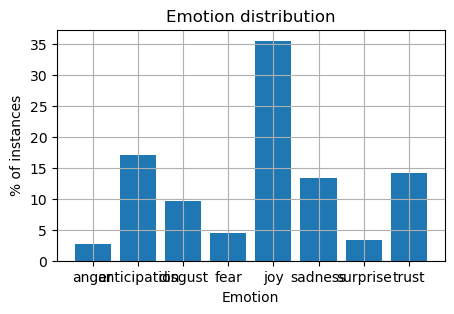

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = t_data['emotion'].unique()
post_total = len(t_data)
df1 = t_data.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(t_data['text'])


In [5]:
print(tokenizer.texts_to_sequences([t_data['text'][0]]))

[[57, 60, 573, 1097, 18, 14, 1174, 293, 19, 1, 1303, 133, 221, 2]]


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [7]:
padded_train_sequences = get_sequences(tokenizer, t_data['text'])

In [9]:
padded_train_sequences[0]

array([  57,   60,  573, 1097,   18,   14, 1174,  293,   19,    1, 1303,
        133,  221,    2,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [10]:
padded_train_sequences.shape

(1455563, 50)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_train_sequences, t_data['emotion'] ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [1]:
print("x_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

NameError: name 'X_train' is not defined

In [13]:
t_data.head()

,hashtags,tweet_id,text,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation


In [110]:
X_train

array([[  11,   13, 8435, ...,    0,    0,    0],
       [   5,    9,   51, ...,    0,    0,    0],
       [  92,  148, 1218, ...,    0,    0,    0],
       ...,
       [   5,   81,    6, ...,    0,    0,    0],
       [   1,    1, 3239, ...,    0,    0,    0],
       [  66, 3144,  530, ...,    0,    0,    0]], dtype=int32)

In [10]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
import keras
from keras.utils import np_utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 625604         fear
976516     surprise
1260188     disgust
383619          joy
Name: emotion, dtype: object

y_train.shape:  (1091672,)
y_test.shape:  (363891,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1091672, 8)
y_test.shape:  (363891, 8)


In [11]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

2022-11-20 20:26:27.381991: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce RTX 3090 Ti computeCapability: 8.6
coreClock: 1.905GHz coreCount: 84 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 938.86GiB/s
2022-11-20 20:26:27.382445: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-11-20 20:26:27.383015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce RTX 3090 Ti computeCapability: 8.6
coreClock: 1.905GHz coreCount: 84 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 938.86GiB/s
2022-11-20 20:26:27.383366: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-11-20 20:26:27.383417: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-11-20 20:26:27.383428: I tenso

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 8)                 328       
Total params: 176,008
Trainable params: 176,008
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.callbacks import CSVLogger, ModelCheckpoint

csv_logger = CSVLogger('logs/training_log.csv')
callbacks = [ModelCheckpoint(filepath='./model/model_{epoch}.h5', save_weights_only=True, verbose=1, save_best_only=True), csv_logger]


h = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size=128,
    epochs=50,
    callbacks=callbacks,
)

Epoch 1/50


2022-11-20 20:26:28.891990: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-20 20:26:28.892967: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2095330000 Hz
2022-11-20 20:26:33.456919: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-11-20 20:26:34.593771: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2022-11-20 20:26:34.893051: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-11-20 20:26:36.147323: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-11-20 20:26:36.147440: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 1694/17058 [=>............................] - ETA: 4:02 - loss: 1.5204 - accuracy: 0.4425

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [ ]:
eval = model.evaluate(X_test, y_test)

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/eric/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer(tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_vectorizer.fit(t_data['text'])

train_data_BOW_features = BOW_vectorizer.transform(t_data['text'])

## check dimension
train_data_BOW_features.shape

In [48]:
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(["'96😉😘☺❤", "'97", "'98", "'99", "'^^", "'aave", "'abbas",
       "'abbreviated", "'abdicate", "'able"], dtype=object)

In [19]:
t_data_sample = t_data.sample(n=300000)
len(t_data_sample)

300000

In [20]:
t_data_sample.emotion.value_counts()

joy             106106
anticipation     51596
trust            42348
sadness          39812
disgust          28604
fear             13161
surprise         10098
anger             8275
Name: emotion, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

BOW_vectorizer.fit(t_data_sample['text'])

X_train, X_test, y_train, y_test = train_test_split(t_data_sample['text'], t_data_sample['emotion'] ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

X_train = BOW_vectorizer.transform(X_train)
X_test = BOW_vectorizer.transform(X_test)

In [24]:
print("x_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (225000, 305611)
y_train.shape:  (225000,)
x_test.shape:  (75000, 305611)
y_test.shape:  (75000,)


In [69]:
from sklearn.tree import DecisionTreeClassifier
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


In [27]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
import keras
from keras.utils import np_utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 1180340           trust
1102048           trust
126976     anticipation
501436            anger
Name: emotion, dtype: object

y_train.shape:  (225000,)
y_test.shape:  (75000,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]

y_train.shape:  (225000, 8)
y_test.shape:  (75000, 8)


In [28]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  305611
output_shape:  8


In [29]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=2048)(X)  # 2048
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=1024)(H1)  # 1024
H2 = ReLU()(H1_W2)

# 2nd hidden layer
H2_W3 = Dense(units=512)(H2)  # 512
H3 = ReLU()(H2_W3)

# 2nd hidden layer
H3_W4 = Dense(units=128)(H3)  # 128
H4 = ReLU()(H3_W4)

# 2nd hidden layer
H4_W5 = Dense(units=64)(H4)  # 64
H5 = ReLU()(H4_W5)

# output layer
H5_W6 = Dense(units=output_shape)(H5)  # 8
H6 = Softmax()(H5_W6)

model_output = H6

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

2022-11-19 13:48:04.095291: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce RTX 3090 Ti computeCapability: 8.6
coreClock: 1.905GHz coreCount: 84 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 938.86GiB/s
2022-11-19 13:48:04.095965: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-11-19 13:48:04.096798: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce RTX 3090 Ti computeCapability: 8.6
coreClock: 1.905GHz coreCount: 84 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 938.86GiB/s
2022-11-19 13:48:04.097420: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-11-19 13:48:04.097505: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-11-19 13:48:04.097525: I tenso

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 305611)]          0         
_________________________________________________________________
dense (Dense)                (None, 2048)              625893376 
_________________________________________________________________
re_lu (ReLU)                 (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
re_lu_2 (ReLU)               (None, 512)               0     

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 64

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/home/eric/anaconda3/envs/dm_tf_2.5_py_3.7_spacy/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 2048), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
2022-11-19 13:49:40.874339: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-19 13:49:40.880127: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2095330000 Hz
2022-11-19 13:49:41.816398: I tensorflow/stream_executor/platform/defau

   1/7032 [..............................] - ETA: 38:33:40 - loss: 2.0816 - accuracy: 0.0000e+00

2022-11-19 13:49:46.019413: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-11-19 13:49:46.019536: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 485/7032 [=>............................] - ETA: 9:44 - loss: 1.6959 - accuracy: 0.3794

In [ ]:
from sklearn.metrics import accuracy_score

pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

# Answer here
fig = plt.figure(figsize=(15, 6), facecolor="#f5f5f5")
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

training_log.plot(x="epoch", y=["accuracy","val_accuracy"], ax=ax_1)
training_log.plot(x="epoch", y=["loss","val_loss"], ax=ax_2)
plt.show()

## Word2Vec Solution

In [11]:
import spacy
import spacy.cli

spacy.cli.download("en_core_web_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 8.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [20]:
nlp = spacy.load('en_core_web_md', disable=["ner", "parser"])
for token in  nlp("Apple is looking at buying U.K. startup for $1 billion"):
  print('Word: {}  --> {}'.format(token.text, token.lemma_))

Word: Apple  --> Apple
Word: is  --> be
Word: looking  --> look
Word: at  --> at
Word: buying  --> buy
Word: U.K.  --> U.K.
Word: startup  --> startup
Word: for  --> for
Word: $  --> $
Word: 1  --> 1
Word: billion  --> billion


In [12]:
from gensim.models import Word2Vec
model = Word2Vec.load("wiki-lemma-100D-phrase")

In [13]:
model.wv['Google']

array([ 3.3885376 , -4.2511983 , -1.445084  ,  1.9302932 ,  0.84648174,
       -0.63184077,  0.05726242,  0.7063744 , -0.05059653,  2.1846352 ,
       -0.12328646,  0.6471171 ,  0.25026178, -0.14930539, -0.07820829,
        0.16145864,  0.6498362 ,  1.0886047 ,  1.5343726 ,  4.950689  ,
        0.50769436, -0.3946989 ,  2.1025164 , -3.1834273 ,  2.380777  ,
        0.24872196, -2.5802555 ,  1.4149348 ,  0.63408375, -1.6591691 ,
       -2.4389815 ,  2.1249    ,  0.39783332, -0.35228804, -2.9626958 ,
       -4.475956  , -4.0608654 , -0.39374784, -0.37150937, -1.4930124 ,
       -2.4813695 ,  2.203496  ,  1.9972353 ,  5.479271  , -0.00601585,
        2.1382024 , -1.6378103 ,  1.9081411 , -0.6341882 , -2.2414782 ,
       -0.70867395,  1.1144645 , -1.7722839 ,  0.37062666,  0.80082476,
        1.9306395 ,  0.48852623, -1.1423063 ,  3.0780652 ,  0.7570495 ,
       -2.8385687 ,  0.5158689 , -1.316193  ,  0.51292163,  1.862376  ,
        1.7524154 ,  1.8987881 ,  0.06306809,  1.378573  , -3.18

In [14]:
model.wv.most_similar('Google', topn = 5)

[('Microsoft', 0.8559668660163879),
 ('Google_Search', 0.8424477577209473),
 ('Google_Analytics', 0.8412379026412964),
 ('Yahoo', 0.8326561450958252),
 ('AltaVista', 0.824895977973938)]

In [23]:
import numpy as np
# Get all words from wiki word2vec model
model_words = set(model.wv.index_to_key)

def text2vec_raw(w2vmodel, text):
    doc = nlp(text)
    # convert a movie review into vectors
    text_vecs = [w2vmodel.wv[word.lemma_] for word in doc if word.lemma_ in model_words]
    # calculate the mean of the vectors and return

    if len(text_vecs) > 1:
        res =  np.mean(text_vecs, axis = 0)
        return res
    elif len(text_vecs) == 1:
        return text_vecs[0]
    else:
        return np.nan


In [17]:
t_data

,hashtags,tweet_id,text,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...,...
1455558,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,[],0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,[blessyou],0x2cbca6,there's currently two girls walking around the...,joy
1455561,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [18]:
t_data_samp = t_data.sample(n=1000)
t_data_samp

,hashtags,tweet_id,text,emotion
350113,[],0x2ca382,Anyone else having trouble with people hearing...,anger
449783,[],0x2035df,@SubwayUK lady with 3 kids orders her subs get...,anger
140636,"[SDLive, BHRants]",0x253acb,#SDLive #BHRants What? Nooooooooo..... Damm...,sadness
70472,[],0x274814,@DeneezWilton Sadly it's work work and more wo...,anticipation
1195221,[],0x243584,Thanks @WOWCare for shutting off my Spectrum c...,disgust
...,...,...,...,...
1354264,"[bored, needcompany]",0x2e2591,Man I swear this lonliness is a killer! <LH> #...,sadness
715555,[Life],0x23f5e5,71 The moments in your life are only once #Lif...,anticipation
882375,[],0x249d2e,The mad hatter followed me back <LH>,joy
1235679,[rest],0x1fc389,We live by faith and not by sight. <LH> is a #...,anticipation


In [24]:
t_data_samp['vector'] = t_data_samp['text'].apply(lambda x: text2vec_raw(model, x))

In [66]:
text2vec_raw(model, t_data_samp['text'].iloc[600])

(100,)


array([ 2.3529148 , -0.7995436 , -1.290243  , -2.1264172 ,  1.7441769 ,
       -1.9418788 , -0.8236468 , -0.650522  , -0.96203744,  1.057259  ,
       -0.5118489 , -0.08906591,  0.38643178,  2.5311189 ,  0.31920803,
        1.7734022 , -0.26587078,  1.3051355 , -2.746254  ,  1.36977   ,
        1.1873134 , -1.2268773 ,  0.05694005, -2.3909225 ,  0.4992917 ,
        2.5837238 , -1.0950522 ,  0.20289445, -3.1187425 ,  0.512852  ,
        2.7052267 , -0.83877486, -1.5630248 ,  1.3589079 , -0.26983792,
       -0.9771223 , -1.9546069 ,  3.036439  , -1.7873936 ,  1.2526221 ,
       -0.3265841 , -0.594958  ,  0.07077441, -1.7308775 ,  0.0049336 ,
       -0.00702184, -0.3946578 , -0.39048776,  1.1835593 ,  0.8131899 ,
        1.3974149 ,  1.1881543 , -0.03425531, -0.21601997, -0.22773692,
       -0.4332052 , -1.7837671 , -1.6226246 ,  0.03755048, -0.770001  ,
       -0.7980662 ,  0.6371095 ,  0.80727726,  0.5315795 ,  1.0210673 ,
       -0.5435437 , -2.14473   , -1.2785712 ,  0.24368764,  0.89

In [25]:
t_data_samp

,hashtags,tweet_id,text,emotion,vector
350113,[],0x2ca382,Anyone else having trouble with people hearing...,anger,"[0.63516307, -0.12204711, 0.59430814, -0.28250..."
449783,[],0x2035df,@SubwayUK lady with 3 kids orders her subs get...,anger,"[0.6358651, -0.7534566, 0.28981158, 0.4816956,..."
140636,"[SDLive, BHRants]",0x253acb,#SDLive #BHRants What? Nooooooooo..... Damm...,sadness,"[1.6422894, 0.78033483, -0.60375917, -0.338976..."
70472,[],0x274814,@DeneezWilton Sadly it's work work and more wo...,anticipation,"[0.18952379, -0.19224809, 1.4048302, 1.4452822..."
1195221,[],0x243584,Thanks @WOWCare for shutting off my Spectrum c...,disgust,"[1.6260635, -1.3257556, 0.36988804, -0.4896546..."
...,...,...,...,...,...
1354264,"[bored, needcompany]",0x2e2591,Man I swear this lonliness is a killer! <LH> #...,sadness,"[0.62347585, 0.78259563, 0.27877948, 0.2901651..."
715555,[Life],0x23f5e5,71 The moments in your life are only once #Lif...,anticipation,"[1.0212884, 0.24969271, 0.08531779, -0.7994799..."
882375,[],0x249d2e,The mad hatter followed me back <LH>,joy,"[1.064747, 0.23097391, -0.07503537, 0.24831676..."
1235679,[rest],0x1fc389,We live by faith and not by sight. <LH> is a #...,anticipation,"[0.6774949, 0.66677576, 0.2568652, 0.60167503,..."


In [28]:
vector_df = pd.DataFrame(t_data_samp.vector.tolist())
vector_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.635163,-0.122047,0.594308,-0.282501,0.525212,-1.802618,-2.124748,-0.959395,0.180614,-0.306651,...,-0.821387,0.088936,0.272867,0.282741,0.590479,-1.136711,0.002430,-0.312248,-0.310040,-0.039391
1,0.635865,-0.753457,0.289812,0.481696,0.390012,-1.243120,-1.383455,-1.198402,-0.726877,0.567202,...,-0.235503,-0.006586,0.071047,-0.920761,0.512533,-2.154377,-0.469931,0.985071,-0.243562,-0.602385
2,1.642289,0.780335,-0.603759,-0.338976,-1.005772,-1.426581,0.290834,-0.425465,0.152828,1.066605,...,-0.242817,0.664559,0.291436,-0.515958,0.290315,0.768942,-0.210085,-0.657899,0.934261,-0.174212
3,0.189524,-0.192248,1.404830,1.445282,-0.231672,-0.680191,-1.413430,0.632139,-0.661203,-0.304390,...,0.876680,0.485042,-1.131958,-0.036127,0.557664,-1.137212,-0.643251,0.399119,-1.468875,-0.156565
4,1.626063,-1.325756,0.369888,-0.489655,0.218872,-0.505515,-0.610795,-0.530513,-1.033673,0.260639,...,-0.933597,-0.151567,0.148089,-0.680746,0.924982,-0.387138,0.240546,-0.084480,-0.905448,-0.542738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.623476,0.782596,0.278779,0.290165,-0.087404,-1.003928,-1.247360,-1.631034,-0.136171,1.094705,...,-0.609228,1.562816,1.271865,-0.771406,0.191574,-0.507979,-0.319143,1.162379,0.995333,-0.643111
996,1.021288,0.249693,0.085318,-0.799480,0.449860,-0.520089,-2.013687,-0.180906,0.562471,0.438246,...,0.179843,1.762386,-0.119320,-1.264627,0.739894,-0.984370,-0.512063,0.567764,-0.062384,0.769198
997,1.064747,0.230974,-0.075035,0.248317,0.288564,-0.603564,-0.984938,-1.003436,-0.111976,-0.304578,...,-0.732562,-0.406781,0.906283,-1.361811,0.305289,-0.812587,0.748405,1.941402,0.965822,-0.502068
998,0.677495,0.666776,0.256865,0.601675,-0.310665,-0.472923,-0.728916,-0.284147,-0.130586,0.730669,...,0.173538,0.685187,0.596921,-1.299385,0.345588,0.108865,0.266614,0.608070,-0.125413,-0.226123


In [31]:
vector_df['emotion'] = t_data_samp['emotion'].values
vector_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,emotion
0,0.635163,-0.122047,0.594308,-0.282501,0.525212,-1.802618,-2.124748,-0.959395,0.180614,-0.306651,...,0.088936,0.272867,0.282741,0.590479,-1.136711,0.002430,-0.312248,-0.310040,-0.039391,anger
1,0.635865,-0.753457,0.289812,0.481696,0.390012,-1.243120,-1.383455,-1.198402,-0.726877,0.567202,...,-0.006586,0.071047,-0.920761,0.512533,-2.154377,-0.469931,0.985071,-0.243562,-0.602385,anger
2,1.642289,0.780335,-0.603759,-0.338976,-1.005772,-1.426581,0.290834,-0.425465,0.152828,1.066605,...,0.664559,0.291436,-0.515958,0.290315,0.768942,-0.210085,-0.657899,0.934261,-0.174212,sadness
3,0.189524,-0.192248,1.404830,1.445282,-0.231672,-0.680191,-1.413430,0.632139,-0.661203,-0.304390,...,0.485042,-1.131958,-0.036127,0.557664,-1.137212,-0.643251,0.399119,-1.468875,-0.156565,anticipation
4,1.626063,-1.325756,0.369888,-0.489655,0.218872,-0.505515,-0.610795,-0.530513,-1.033673,0.260639,...,-0.151567,0.148089,-0.680746,0.924982,-0.387138,0.240546,-0.084480,-0.905448,-0.542738,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.623476,0.782596,0.278779,0.290165,-0.087404,-1.003928,-1.247360,-1.631034,-0.136171,1.094705,...,1.562816,1.271865,-0.771406,0.191574,-0.507979,-0.319143,1.162379,0.995333,-0.643111,sadness
996,1.021288,0.249693,0.085318,-0.799480,0.449860,-0.520089,-2.013687,-0.180906,0.562471,0.438246,...,1.762386,-0.119320,-1.264627,0.739894,-0.984370,-0.512063,0.567764,-0.062384,0.769198,anticipation
997,1.064747,0.230974,-0.075035,0.248317,0.288564,-0.603564,-0.984938,-1.003436,-0.111976,-0.304578,...,-0.406781,0.906283,-1.361811,0.305289,-0.812587,0.748405,1.941402,0.965822,-0.502068,joy
998,0.677495,0.666776,0.256865,0.601675,-0.310665,-0.472923,-0.728916,-0.284147,-0.130586,0.730669,...,0.685187,0.596921,-1.299385,0.345588,0.108865,0.266614,0.608070,-0.125413,-0.226123,anticipation


In [33]:
model.wv.save_word2vec_format('keras_word2vec.txt', binary=False)

In [34]:
import numpy as np
# load the whole embedding into memory
embeddings_index = dict()
with open('keras_word2vec.txt') as f:
  for line in f:
    values = line.split()
    # 只接受長度為 101 的向量 (word + 100d embedding)
    if len(values) != 101:
      print(values)
      continue
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

['346848', '100']


In [35]:
import numpy as np
### 找出影評共有幾個 words
sentence_lengths = t_data_samp['text'].apply(lambda x: len(x.split()))
quantiles = np.percentile(sentence_lengths, [25, 50, 75])

print('The minimal word count in a movie review: ', min(sentence_lengths))
print('The first quantile (25%) of word count in a movie review:', quantiles[0])
print('The second quantile (50%) of word count in a movie review:', quantiles[1])
print('The third quantile (75%) of word count in a movie review:', quantiles[2])
print('The maximum word count in a movie review: ', max(sentence_lengths))

The minimal word count in a movie review:  1
The first quantile (25%) of word count in a movie review: 10.0
The second quantile (50%) of word count in a movie review: 15.0
The third quantile (75%) of word count in a movie review: 20.0
The maximum word count in a movie review:  30


In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_md")

In [36]:
from tqdm import tqdm
nlp = spacy.load('en_core_web_md', disable=["ner", "parser"])

review_lines = list()
reviews = t_data_samp['text'].values.tolist()

for review in tqdm(reviews):   
    doc = nlp(review)
    words = [word.lemma_ for word in doc]
    review_lines.append(words)

100%|███████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 279.55it/s]


In [80]:
review_lines

[['the',
  'meeting',
  'I',
  'have',
  'today',
  'with',
  'the',
  'homie',
  'zarub',
  'at',
  '@Unapologeticclo',
  'get',
  'I',
  'waaayyyy',
  'motivated',
  '!',
  'lol',
  '#',
  'NewMoves',
  '#',
  'Mentor',
  '<',
  'LH',
  '>',
  '#',
  'Grind',
  '#',
  '2018'],
 ['the', 'tree', 'have', 'dangerous', 'level', 'of', 'PM10', '<', 'LH', '>'],
 ['@jeffgerstmann',
  'so',
  'happy',
  'to',
  'hear',
  'that',
  ',',
  'Jeff',
  '.',
  'this',
  'good',
  'news',
  'and',
  'Coke',
  'Zero',
  'in',
  'one',
  'week',
  '?',
  '<',
  'LH',
  '>'],
 ['I',
  'really',
  'wanna',
  'try',
  'something',
  '#',
  'bold',
  'and',
  '<',
  'LH',
  '>',
  'with',
  'my',
  'hair',
  '...',
  'but',
  ',',
  'I',
  'do',
  'not',
  'wanna',
  'cut',
  'or',
  'color',
  'it',
  '😆',
  '🤦',
  '🏾'],
 ['this',
  'derpy',
  'fck',
  '<',
  'LH',
  '>',
  '#',
  'dog',
  '#',
  'puppy',
  '#',
  'notreallyapuppyanymorethough',
  '...'],
 ['heal',
  'the',
  '#',
  'sick',
  'give',
  'r

In [37]:
import numpy as np
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

# 初始化 tokenizer
# 將文字轉換成 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(review_lines)
sequences = tokenizer_obj.texts_to_sequences(review_lines)

# 因為model的input必須一樣長，所以要使用padding，句子短於512的都會補0，長於512的會被truncate
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))
review_pad = pad_sequences(sequences, maxlen=512)

sentiment =  t_data_samp['emotion'].values
print('Shape of review tensor:', review_pad.shape)
print('Shape of sentiment tensor:', sentiment.shape)


Found 4118 unique tokens.
Shape of review tensor: (1000, 512)
Shape of sentiment tensor: (1000,)


In [41]:
sequences

[[220,
  361,
  23,
  1210,
  31,
  71,
  315,
  428,
  316,
  270,
  1211,
  749,
  429,
  28,
  1212,
  24,
  1,
  2,
  3],
 [1213,
  362,
  31,
  177,
  363,
  364,
  178,
  535,
  34,
  11,
  750,
  124,
  13,
  317,
  1214,
  46,
  5,
  50,
  751,
  536,
  535,
  9,
  752,
  753,
  92,
  536,
  153,
  125,
  24,
  1,
  2,
  3],
 [4,
  1215,
  4,
  1216,
  14,
  41,
  24,
  103,
  1217,
  271,
  1218,
  6,
  103,
  430,
  1219,
  6,
  14,
  1,
  2,
  3],
 [1220,
  1221,
  22,
  5,
  76,
  76,
  15,
  97,
  76,
  10,
  272,
  63,
  754,
  18,
  8,
  116,
  537,
  1,
  2,
  3],
 [65, 1222, 16, 755, 153, 20, 1223, 1224, 16, 20, 179, 756, 1, 2, 3],
 [80,
  26,
  154,
  11,
  220,
  133,
  11,
  431,
  8,
  757,
  107,
  11,
  54,
  6,
  4,
  1225,
  1226,
  202,
  4,
  1227,
  202,
  4,
  432,
  202,
  1,
  2,
  3],
 [7,
  5,
  35,
  117,
  7,
  76,
  31,
  85,
  134,
  273,
  19,
  71,
  57,
  50,
  7,
  538,
  15,
  758,
  274,
  1,
  2,
  3],
 [1,
  2,
  3,
  5,
  17,
  1228,
  22,


In [42]:
# 建立一個 look up table，第一個 row 就是第一個單詞的 word embedding
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer_obj.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant
import tensorflow as tf


# define model
gru_model = Sequential()
e = Embedding(vocab_size, 100, embeddings_initializer=Constant(embedding_matrix), trainable=False)
gru_model.add(e)
gru_model.add(GRU(64, dropout = 0.2, recurrent_dropout = 0.2))
gru_model.add(Dense(1, activation='sigmoid'))
# compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(gru_model.summary())

NotImplementedError: Cannot convert a symbolic Tensor (gru_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported